<div class="alert alert-info" role="alert">
    This tutorial contains a lot of bokeh plots, which may take a little while to load and render.
</div>

One of the major design principles of HoloViews is that the declaration of data is completely independent from the plotting implementation. This means that the visualization of HoloViews data structures can be performed by different plotting backends. As part of the 1.4 release of HoloViews, a [Bokeh](http://bokeh.pydata.org) backend was added in addition to the default ``matplotlib`` backend. Bokeh provides a powerful platform to generate interactive plots using HTML5 canvas and WebGL, and is ideally suited towards interactive exploration of data.

By combining the ease of generating interactive, high-dimensional visualizations with the interactive widgets and fast rendering provided by Bokeh, HoloViews becomes even more powerful.

This tutorial will cover some basic options on how to style and change various plot attributes and explore some of the more advanced features like interactive tools, linked axes, and brushing.

As usual, the first thing we do is initialize the HoloViews notebook extension, but we now specify the backend specifically.

In [1]:
import numpy as np
import pandas as pd
import holoviews as hv

In [2]:
hv.notebook_extension('bokeh')

/home/kalidus/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


We could instead leave the default backend as ``'matplotlib'``, and then switch only some specific cells to use bokeh using a  cell magic:

```python
%%output backend='bokeh'
obj
```

## Element Style options

Most Bokeh Elements support a mixture of the following fill, line, and text style customization options:

In [3]:
from holoviews.plotting.bokeh.element import (line_properties, fill_properties,
                                              text_properties)
print("""
      Line properties: %s\n
      Fill properties: %s\n
      Text properties: %s
      """ % (line_properties, fill_properties, text_properties))


      Line properties: ['line_color', 'line_alpha', 'color', 'alpha', 'line_width', 'line_join', 'line_cap', 'line_dash', 'selection_line_color', 'nonselection_line_color', 'muted_line_color', 'selection_line_alpha', 'nonselection_line_alpha', 'muted_line_alpha', 'selection_color', 'nonselection_color', 'muted_color', 'selection_alpha', 'nonselection_alpha', 'muted_alpha']

      Fill properties: ['fill_color', 'fill_alpha', 'selection_fill_color', 'nonselection_fill_color', 'muted_fill_color', 'selection_fill_alpha', 'nonselection_fill_alpha', 'muted_fill_alpha']

      Text properties: ['text_font', 'text_font_size', 'text_font_style', 'text_color', 'text_alpha', 'text_align', 'text_baseline']
      


Here's an example of HoloViews Elements using a Bokeh backend, with bokeh's style options:

In [5]:
#%%opts Curve.A [width=300 height=300] Points.B [width=600 height=300]
curve_opts = dict(line_width=10, line_color='indianred', line_dash='dotted', line_alpha=0.5)
point_opts = dict(fill_color='#00AA00', fill_alpha=0.5, line_width=1, line_color='black', size=5)
text_opts  = dict(text_align='center', text_baseline='middle', text_color='gray', text_font='Arial')
xs = np.linspace(0, np.pi*4, 100)
data = (xs, np.sin(xs))

(hv.Curve(data,group='A')(style=curve_opts) *
 hv.Points(data,group='B')(style=point_opts) *
 hv.Text(6, 0, 'Here is some text')(style=text_opts))

:Overlay
   .A.I    :Curve   [x]   (y)
   .B.I    :Points   [x,y]
   .Text.I :Text   [x,y]

b':Curve   [x]   (y)'
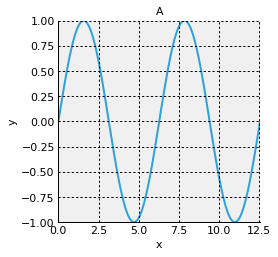

In [6]:
%%output backend='matplotlib'
#%%opts Curve.A [width=300 height=600]
hv.Curve(data,group='A')(style=curve_opts)

In [3]:
hv.ipython.show_traceback() 

None


Notice that because the first two plots use the same underlying data, they become linked, such that zooming or panning one of the plots makes the corresponding change on the other.

### Sizing Elements

Sizing and aspect of Elements in bokeh are always computed in absolute pixels. To change the size or aspect of an Element set the ``width`` and ``height`` plot options.

In [4]:
%%opts Points.A [width=300 height=300] Points.B [width=600 height=300]
hv.Points(data, group='A') + hv.Points(data, group='B')

ERROR:root:Cell magic `%%opts` not found.


### Controlling axes

Bokeh provides a variety of options to control the axes. Here we provide a quick overview of linked plots for the same data displayed differently by applying log axes, disabling axes, rotating ticks, specifying the number of ticks, and supplying an explicit list of ticks.

In [9]:
points = hv.Points(np.exp(xs)) 
axes_opts = [('Plain', {}),
             ('Log', {'logy': True}),
             ('None', {'yaxis': None}),
             ('Rotate', {'xrotation': 90}),
             ('N Ticks', {'xticks': 3}),
             ('List Ticks', {'xticks': [0, 100, 300, 500]})]

hv.Layout([points.relabel(group=group)(plot=opts)
           for group, opts in axes_opts]).cols(3).display('all')

:Layout
   .Plain.I      :Points   [x,y]
   .Log.I        :Points   [x,y]
   .None.I       :Points   [x,y]
   .Rotate.I     :Points   [x,y]
   .N_Ticks.I    :Points   [x,y]
   .List_Ticks.I :Points   [x,y]

### Datetime axes

Both the matplotlib and the bokeh backends allow plotting datetime data, if you ensure the dates array is of a datetime dtype. Note also that the legends are interactive and can be toggled by clicking on its entries. Additionally the style of unselected curve can be controlled by setting the ``muted_alpha`` and ``muted_color`` style options.

In [7]:
%%opts Overlay [width=600 legend_position='top_left'] Curve (muted_alpha=0.5 muted_color='black')
try:
    import bokeh.sampledata.stocks
except:
    import bokeh.sampledata
    bokeh.sampledata.download()

from bokeh.sampledata.stocks import GOOG, AAPL
goog_dates = np.array(GOOG['date'], dtype=np.datetime64)
aapl_dates = np.array(AAPL['date'], dtype=np.datetime64)
hv.Curve((goog_dates, GOOG['adj_close']), kdims=['Date'], vdims=['Stock Index'], label='Google') *\
hv.Curve((aapl_dates, AAPL['adj_close']), kdims=['Date'], vdims=['Stock Index'], label='Apple')

:Overlay
   .Curve.Google :Curve   [Date]   (Stock Index)
   .Curve.Apple  :Curve   [Date]   (Stock Index)

### Categorical axes

A number of Elements will also support categorical (i.e. string types) as dimension values, these include ``HeatMap``, ``Points``, ``Scatter``, ``Curve``, ``ErrorBar`` and ``Text`` types.

Here we create a set of points indexed by ascending alphabetical x- and y-coordinates and values multiplying the integer index of each coordinate. We then overlay a ``HeatMap`` of the points with the points themselves enabling the hover tool for both and scaling the point size by the 'z' coordines.

In [8]:
%%opts Points [size_index='z' tools=['hover']] HeatMap [toolbar='above' tools=['hover']]
points = hv.Points([(chr(i+65), chr(j+65), i*j) for i in range(10) for j in range(10)], vdims=['z'])
hv.HeatMap(points) * points

:Overlay
   .HeatMap.I :HeatMap   [x,y]   (z)
   .Points.I  :Points   [x,y]   (z)

In the example above both axes are categorical because a HeatMap by definition represents 2D categorical coordinates (unlike Image and Raster types). Other Element types will automatically infer a categorical dimension if the coordinates along that dimension include string types.

Here we will generate random samples indexed by categories from 'A' to 'E' using the Scatter Element and overlay them.
Secondly we compute the mean and standard deviation for each category and finally we overlay these two elements with a curve representing the mean value and a text element specifying the global mean. All these Elements respect the categorical index, providing us a view of the distribution of values in each category:

In [12]:
%%opts Overlay [show_legend=False height=400 width=600] ErrorBars (line_width=5) Scatter(alpha=0.2 size=6)

overlay = hv.NdOverlay({group: hv.Scatter(([group]*100, np.random.randn(100)*(i+1)+i))
                        for i, group in enumerate(['A', 'B', 'C', 'D', 'E'])})

errorbars = hv.ErrorBars([(k, el.reduce(function=np.mean), el.reduce(function=np.std))
                          for k, el in overlay.items()])

global_mean = hv.Text('A', 12, 'Global mean: %.3f' % overlay.dimension_values('y').mean())

errorbars * overlay * hv.Curve(errorbars) * global_mean

:Overlay
   .ErrorBars.I :ErrorBars   [x]   (y,yerror)
   .NdOverlay.I :NdOverlay   [Element]
      :Scatter   [x]   (y)
   .Curve.I     :Curve   [x]   (y,yerror)
   .Text.I      :Text   [x,y]

## Containers

### Tabs

Using bokeh, both ``(Nd)Overlay`` and ``(Nd)Layout`` types may be displayed inside a ``tabs`` widget. This may be enabled via a plot option ``tabs``, and may even be nested inside a Layout.

In [9]:
%%opts Overlay [tabs=True] Image [width=400 height=400]
x,y = np.mgrid[-50:51, -50:51] * 0.1

img = hv.Image(np.sin(x**2+y**2), bounds=(-1,-1,1,1))
img.relabel('Low') * img.clone(img.data*2).relabel('High')

:Overlay
   .Image.Low  :Image   [x,y]   (z)
   .Image.High :Image   [x,y]   (z)

Another reason to use ``tabs`` is that some Layout combinations may not be able to be displayed directly using HoloViews. For example, it is not currently possible to display a ``GridSpace`` as part of a ``Layout`` in any backend, and this combination will automatically switch to a ``tab`` representation for the bokeh backend.

### Marginals


The Bokeh backend also supports marginal plots to generate adjoined plots. The most convenient way to build an AdjointLayout is with the ``.hist()`` method.

In [24]:
%%opts Points [ tools=['hover,lasso_select']]  Layout [shared_axes=True shared_datasource=True]
rand = np.random.randn(500,2)
points = hv.Points(rand)
points2 = hv.Points(rand)
points.hist(num_bins=51, dimension=['x','y'])+points2

:Layout
   .AdjointLayout.I :AdjointLayout
      :Histogram   [x]   (Frequency)
      :Points   [x,y]
      :Histogram   [y]   (Frequency)
   .Points.I        :Points   [x,y]

When the histogram represents a quantity that is mapped to a value dimension with a corresponding colormap, it will automatically share the colormap, making it useful as a colorbar for that dimension as well as a histogram.

In [17]:
img.hist(num_bins=100, dimension=['x', 'y'], weight_dimension='z', mean_weighted=True) +\
img.hist(dimension='z')

:Layout
   .AdjointLayout.I  :AdjointLayout
      :Histogram   [x]   (z)
      :Image   [x,y]   (z)
      :Histogram   [y]   (z)
   .AdjointLayout.II :AdjointLayout
      :Image   [x,y]   (z)
      :Histogram   [z]   (Frequency)

## HoloMaps

HoloMaps work in bokeh just as in other backends.

In [18]:
hmap = hv.HoloMap({phase: img.clone(np.sin(x**2+y**2+phase))
                   for phase in np.linspace(0, np.pi*2, 6)}, kdims=['Phase'])
hmap.hist(num_bins=100, dimension=['x', 'y'], weight_dimension='z', mean_weighted=True)

b':AdjointLayout\n   :HoloMap   [Phase]\n      :Histogram   [x]   (z)\n   :HoloMap   [Phase]\n      :Image   [x,y]   (z)\n   :HoloMap   [Phase]\n      :Histogram   [y]   (z)'

## Tools: Interactive widgets

#### Hover tools

Some Elements allow revealing additional data by hovering over the data. To enable the hover tool, simply supply ``'hover'`` as a list to the ``tools`` plot option.

In [19]:
%%opts Points [tools=['hover']] (size=5) HeatMap [tools=['hover']] Histogram [tools=['hover']] Layout [shared_axes=False]
error = np.random.rand(100, 3)
heatmap_data = {(chr(65+i),chr(97+j)):i*j for i in range(5) for j in range(5) if i!=j}
data = [np.random.normal() for i in range(10000)]
hist = np.histogram(data, 20)
hv.Points(error) + hv.HeatMap(heatmap_data).sort() + hv.Histogram(hist)

:Layout
   .Points.I    :Points   [x,y]
   .HeatMap.I   :HeatMap   [x,y]   (z)
   .Histogram.I :Histogram   [x]   (Frequency)

#### Selection tools

Bokeh provides a number of tools for selecting data points including ``tap``, ``box_select``, ``lasso_select`` and ``poly_select``. To distinguish between selected and unselected data points we can also control the color and alpha of the ``selection`` and ``nonselection`` points.  You can try out any of these selection tools and see how the plot is affected:

In [20]:
%%opts Points [tools=['box_select', 'lasso_select', 'tap']] (size=10 nonselection_color='red' color='blue')
hv.Points(error)

b':Points   [x,y]'

#### Selection widget with shared axes and linked brushing

When dealing with complex multi-variate data it is often useful to explore interactions between variables across plots. HoloViews will automatically link the data sources of plots in a Layout if they draw from the same data, allowing for both linked axes and brushing.

We'll see what this looks like in practice using a small dataset of macro-economic data:

In [21]:
macro_df = pd.read_csv('http://assets.holoviews.org/macro.csv', '\t')

By creating two ``Points`` Elements, which both draw their data from the same pandas DataFrame, the two plots become automatically linked.  This linking behavior can be toggled with the ``shared_datasource`` plot option on a ``Layout`` or ``GridSpace``.  You can try selecting data in one plot, and see how the corresponding data (those on the same rows of the DataFrame, even if the plots show different data, will be highlighted in each.

In [22]:
%%opts Scatter [tools=['box_select', 'lasso_select']] Layout [shared_axes=True shared_datasource=True]
hv.Scatter(macro_df, kdims=['year'], vdims=['gdp']) +\
hv.Scatter(macro_df, kdims=['gdp'], vdims=['unem'])

:Layout
   .Scatter.I  :Scatter   [year]   (gdp)
   .Scatter.II :Scatter   [gdp]   (unem)

A gridmatrix is a clear use case for linked plotting.  This operation plots any combination of numeric variables against each other, in a grid, and selecting datapoints in any plot will highlight them in all of them.  Such linking can thus reveal how values in a particular range (e.g. very large outliers along one dimension) relate to each of the other dimensions.

In [25]:
%%opts Scatter [tools=['box_select', 'lasso_select', 'hover'] border=0] Histogram {+axiswise}
table = hv.Table(macro_df, kdims=['year', 'country'])
matrix = hv.operation.gridmatrix(table.groupby('country'))
matrix.select(country=['West Germany', 'United Kingdom', 'United States'])

b':GridMatrix   [X,Y]\n   :HoloMap   [country]\n      :Histogram   [year]   (Frequency)'

The [Bokeh Elements](Bokeh_Elements.ipynb) tutorial shows examples of all the Elements supported for Bokeh, in a format that can be compared with the default matplotlib [Elements](Elements.ipynb) tutorial.